In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import rasterio
import os
from functions import *
from pathlib import Path
from scipy import stats
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
#Satellite datas directory
data_dir = Path('../Data')

In [3]:
for file in os.listdir(data_dir):
    if file.endswith('.tif'):
        print(f'Processing {file}...')
        read_raster(data_dir / file, data_dir)
        

Processing LULC.tif...
Processing landsat_9.tif...
Calculation oqf NDVI, EVI, NDWI in progress... of the raster file: {basename} 
Raster file saved at: ../Data/NDVI/landsat_9NDVI.tif
Raster file saved at: ../Data/EVI/landsat_9EVI.tif
Raster file saved at: ../Data/NDWI/landsat_9NDWI.tif
Raster file saved at: ../Data/SAVI/landsat_9SAVI.tif
Processing landsat_8.tif...
Calculation oqf NDVI, EVI, NDWI in progress... of the raster file: {basename} 
Raster file saved at: ../Data/NDVI/landsat_8NDVI.tif
Raster file saved at: ../Data/EVI/landsat_8EVI.tif
Raster file saved at: ../Data/NDWI/landsat_8NDWI.tif
Raster file saved at: ../Data/SAVI/landsat_8SAVI.tif
Processing LULC_Resampled.tif...


<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Plotting the Indexes</span>


/Users/supath/Downloads/GeoWorldCode/code/functions.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


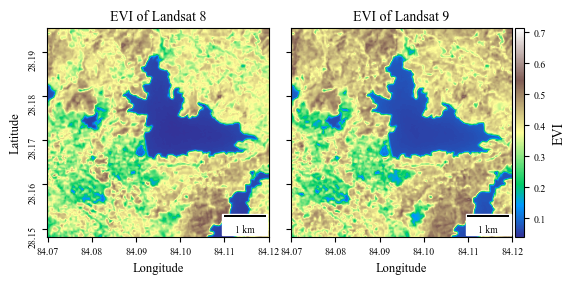

/Users/supath/Downloads/GeoWorldCode/code/functions.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


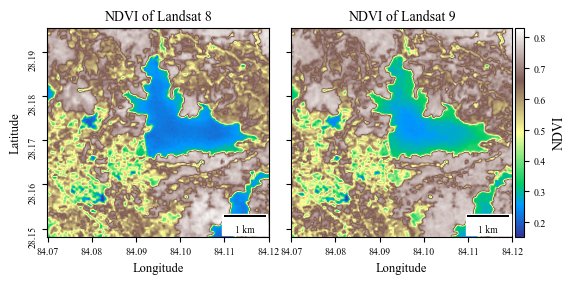

/Users/supath/Downloads/GeoWorldCode/code/functions.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


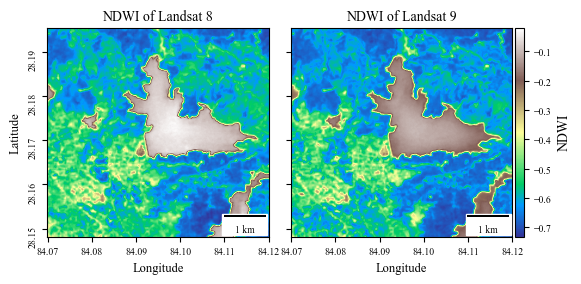

/Users/supath/Downloads/GeoWorldCode/code/functions.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


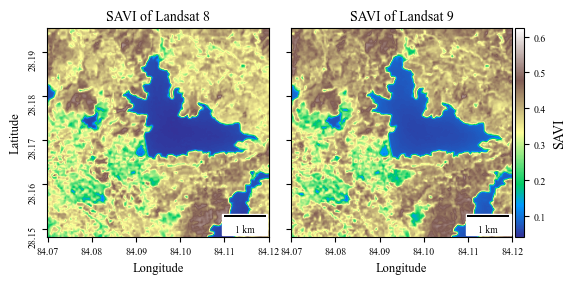

In [4]:
#Calling the function to plot the rasters
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/EVI', ["EVI of Landsat 8", "EVI of Landsat 9"], "EVI", '../Images/EVI.png')
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/NDVI', ["NDVI of Landsat 8", "NDVI of Landsat 9"], "NDVI", '../Images/NDVI.png')
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/NDWI', ["NDWI of Landsat 8", "NDWI of Landsat 9"], "NDWI", '../Images/NDWI.png')
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/SAVI', ["SAVI of Landsat 8", "SAVI of Landsat 9"], "SAVI",  '../Images/SAVI.png')

<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Plotting the BOX PLOT</span>


In [5]:
#Getting the sampled data
NDVI_dir = Path('../Data/NDVI')
process_raster_directory(NDVI_dir)

#FOR NDWI
NDWI_dir = Path('../Data/NDWI')
process_raster_directory(NDWI_dir)

#FOR EVI
EVI_dir = Path('../Data/EVI')
process_raster_directory(EVI_dir)

#FOR SAVI
SAVI_dir = Path('../Data/SAVI')
process_raster_directory(SAVI_dir)

Sampled values saved to ../Data/NDVI/Sampled.csv
Sampled values saved to ../Data/NDWI/Sampled.csv
Sampled values saved to ../Data/EVI/Sampled.csv
Sampled values saved to ../Data/SAVI/Sampled.csv


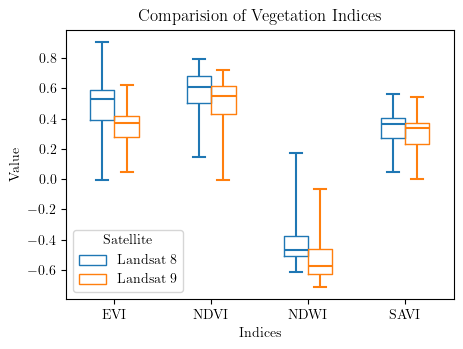

In [4]:
# Load the combined file into a DataFrame
file_path = Path("../Data/VegetationIndicesCombined.csv")
data_frame = pd.read_csv(file_path)

# Plotting box plot for each column
plt.figure(figsize=(5, 3.5))
sns.boxplot(x = 'Indices', y='Value', data=data_frame, hue='Satellite', fill = False, whis=(0,100), width=0.5, boxprops={'linewidth': 1})

plt.title('Comparision of Vegetation Indices', fontsize=12, fontweight='bold')
plt.xlabel('Indices', fontsize=10, fontweight='bold')
plt.ylabel('Value', fontsize=10, fontweight='bold')
plt.legend(title='Satellite', loc='lower left', fontsize=10)

plt.savefig('../Images/boxplot.png', dpi = 500, bbox_inches = 'tight')
plt.show()



<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Correlation</span>


In [86]:
def read_raster(raster):
    with rasterio.open(raster) as src:
        raster = src.read(1)
        flatten = raster.flatten()
        mask = ~np.isnan(flatten)
        flatten_mask  = flatten[mask]
        return flatten_mask
#Vegetation Index
landsat_8 = read_raster('../Data/EVI/landsat_8EVI.tif')
landsat_9 = read_raster('../Data/EVI/landsat_9EVI.tif')


In [87]:
# Landsat_8 and landsat_9 are numpy arrays
raster_data1 = np.array(landsat_8)
raster_data2 = np.array(landsat_9)

# Calculate differences
differences = raster_data1 - raster_data2

# Calculate PBAIS
pba = np.sum(differences) / np.sum(raster_data2) * 100

# Calculate MAE
mae = np.mean(np.abs(differences))

# Calculate RMSE
rmse = np.sqrt(np.mean(differences**2))

print(f"PBAIS: {pba:.2f}%")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

PBAIS: -5.91%
MAE: 0.0326
RMSE: 0.0426


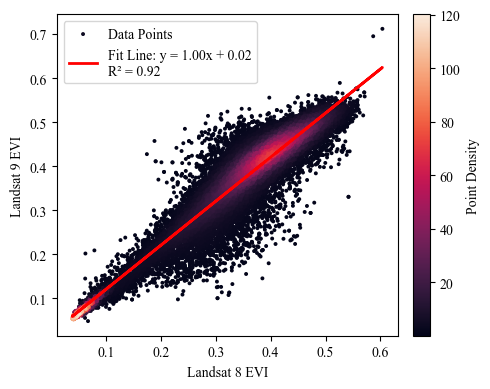

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import gridspec
from scipy.stats import gaussian_kde

# Landsat_8 and landsat_9 are numpy arrays
raster_data1 = np.array(landsat_8)
raster_data2 = np.array(landsat_9)

# Reshape data for sklearn LinearRegression
raster_data1 = raster_data1.reshape(-1, 1)

# Perform linear regression on the full dataset
model = LinearRegression()
model.fit(raster_data1, raster_data2)
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(raster_data2, model.predict(raster_data1))

# Generate fit line
fit_line = model.predict(raster_data1)

# Compute density using Gaussian KDE
kde = gaussian_kde([raster_data1.flatten(), raster_data2.flatten()])
density = kde([raster_data1.flatten(), raster_data2.flatten()])

# Create the plot with gridspec
fig = plt.figure(figsize=(5, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])  # Adjust width ratios as needed

# Main plot
ax0 = plt.subplot(gs[0])
scatter = ax0.scatter(raster_data1, raster_data2, c=density, cmap='rocket', edgecolor='none', alpha=1, s=8, label='Data Points')
ax0.plot(raster_data1, fit_line, color='red', linewidth=2, label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.2f}')
ax0.set_xlabel('Landsat 8 EVI', fontsize=10)
ax0.set_ylabel('Landsat 9 EVI', fontsize=10)
ax0.legend()
ax0.grid(False)

# Color bar
ax1 = plt.subplot(gs[1])
cb = plt.colorbar(scatter, cax=ax1)
cb.set_label('Point Density')

# Adjust the layout
plt.tight_layout()
plt.savefig('../Images/linearregEVI.png', dpi=500, bbox_inches='tight')
plt.show()


## LULC Plot and Classes Distribution

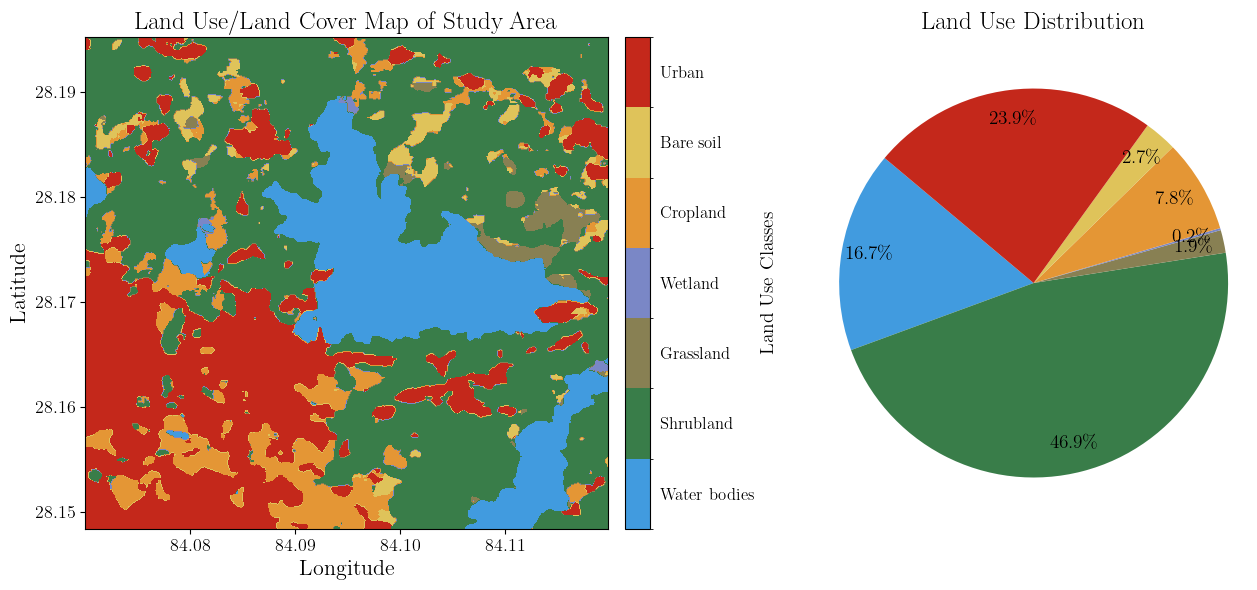

In [12]:
# Load the LULC data
lulc_path = Path('../Data/LULC.tif')
with rasterio.open(lulc_path) as src:
    lulc_data = src.read(1)
    transform = src.transform 
    bounds = src.bounds        

# Define the category names and corresponding colors
category_names = [
    'Water bodies', 'Shrubland', 'Grassland', 'Wetland', 'Cropland', 'Bare soil',
    'Urban'
]
colors = [
    '#419BDF', '#397D49', '#888053', '#7A87C6', '#E49635', '#DFC35A',
    '#C4281B'
]

# Create a color map
cmap = ListedColormap(colors)

# Define the boundaries for each class
boundaries = np.arange(len(category_names) + 1) - 0.5
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Calculate the percentage of each land use class
unique, counts = np.unique(lulc_data, return_counts=True)
total_pixels = lulc_data.size
percentages = (counts / total_pixels) * 100

# Prepare a dictionary to hold percentages for each category
percent_dict = {i: 0 for i in range(len(category_names))}

# Update the dictionary with actual percentages
for u, p in zip(unique, percentages):
    if u < len(category_names):
        percent_dict[u] = p

# Create a list of percentages in the correct order
percentages = [percent_dict[i] for i in range(len(category_names))]

# Append percentages to the category names
category_labels_with_percentages = [
    f"{name}" for name in category_names
]

# Plot the LULC data and pie chart
fig, (ax, ax_pie) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1.5]})

# Use the extent parameter to set the coordinate system
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

im = ax.imshow(lulc_data, cmap=cmap, norm=norm, extent=extent)

# Adjust the position of the color bar to be closer to the raster
cbar = fig.colorbar(im, ax=ax, ticks=np.arange(len(category_names)), spacing='proportional', shrink=1.0, pad=0.02)
cbar.set_label('Land Use Classes', fontsize=14)
cbar.set_ticks(np.arange(len(category_names)))
cbar.set_ticklabels(category_labels_with_percentages)
cbar.ax.tick_params(labelsize=12)  # Adjust color bar tick label size

# Remove color bar percentages
cbar.ax.yaxis.set_tick_params(width=0)  # Hide the y-axis ticks and labels

# Plot the pie chart with larger percentage labels
ax_pie.pie(percentages, colors=colors, autopct=lambda p: f'{p:.1f}%', startangle=140, pctdistance=0.85, textprops={'fontsize': 14})
ax_pie.axis('equal') 
ax_pie.set_title('Land Use Distribution', fontsize=18)

# Set the title and labels for the raster
ax.set_title('Land Use/Land Cover Map of Study Area', fontsize=18)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

# Adjust x and y tick label sizes
ax.tick_params(axis='both', which='major', labelsize=13)

# Show the plot
plt.tight_layout()

# Save the Image
plt.savefig('../Images/LULC.png', dpi=500, bbox_inches='tight')
plt.show()


### Evaluation metrics for each category of LULC

In [89]:
import numpy as np
import rasterio
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
# Function to read LULC raster and return categories
def read_lulc(lulc_raster):
    with rasterio.open(lulc_raster) as src:
        lulc = src.read(1)
        return lulc

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    pbias = 100 * np.sum(y_pred - y_true) / np.sum(y_true)
    return rmse, mae, pbias

In [98]:
#Path of raster files
landsat_8_path = '../Data/SAVI/landsat_8SAVI.tif'
landsat_9_path = '../Data/SAVI/landsat_9SAVI.tif'
lulc_path = '../Data/LULC_Resampled.tif'

In [99]:
# Category names for LULC
category_names = [
    'Water bodies', 'Shrubland', 'Grassland', 'Wetland', 'Cropland', 'Bare soil', 'Urban'
]

# Read rasters and LULC data
landsat_8 = read_raster(landsat_8_path)
landsat_9 = read_raster(landsat_9_path)
lulc = read_lulc(lulc_path)

# Initialize dictionary to store metrics for each category
metrics = {category: {} for category in category_names}

# Iterate over each category
for i, category in enumerate(category_names):
    # Mask data based on the current category
    mask = (lulc.flatten() == i + 1)
    landsat_8_category = landsat_8[mask]
    landsat_9_category = landsat_9[mask]
    
    # Calculate metrics
    rmse, mae, pbias= calculate_metrics(landsat_9_category, landsat_8_category)
    
    # Store metrics in dictionary
    metrics[category] = {
        'RMSE': rmse,
        'MAE': mae,
        'PBIAS': pbias,
    }

#Saving it in a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df = metrics_df.T
# Save the DataFrame to a CSV file
metrics_df.to_csv('../Data/SAVI/LULCMetricsCategory.csv')


# Print or save metrics
for category, metric_values in metrics.items():
    print(f"Category: {category}")
    for metric, value in metric_values.items():
        print(f"  {metric}: {value}")

Category: Water bodies
  RMSE: 0.0319693386554718
  MAE: 0.025454992428421974
  PBIAS: -4.37028095888445
Category: Shrubland
  RMSE: 0.03105757385492325
  MAE: 0.024479782208800316
  PBIAS: -5.436250224089778
Category: Grassland
  RMSE: 0.05665624886751175
  MAE: 0.04503989219665527
  PBIAS: 7.09011924261456
Category: Wetland
  RMSE: 0.051638178527355194
  MAE: 0.038448356091976166
  PBIAS: -1.4379626135715822
Category: Cropland
  RMSE: 0.05522235110402107
  MAE: 0.04584604501724243
  PBIAS: -9.063743196998159
Category: Bare soil
  RMSE: 0.046493325382471085
  MAE: 0.036771975457668304
  PBIAS: -6.375750125496848
Category: Urban
  RMSE: 0.010785575024783611
  MAE: 0.009086232632398605
  PBIAS: 6.779853141858269
